# Compute weekend productivity level distribution by income group and visualize it with a stacked percentage bar plot.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('DailyActivitiesPreProcessed_new.csv')
df 



,Gender,Age,Occupation,Marital status,HouseHoldIncome,Weekday_05:00-05:30,Weekday_05:30-06:00,Weekday_06:00-06:30,Weekday_06:30-07:00,Weekday_07:00-07:30,...,Weekday_Breakfast_time,Weekend_Breakfast_time,Weekday_Lunch_time,Weekend_Lunch_time,Weekday_Dinner_time,Weekend_Dinner_time,Productivity_score_weekday,Productivity_score_weekend,Activity_Level_weekday,Activity_Level_weekend
0,Female,23,Student,Single,0.0,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,...,08:30-09:00,NaN,NaN,NaN,18:00-18:30,23:00-23:30,0.437500,0.270833,Moderate,Moderate
1,Female,23,Student,Single,100000.0,Sleeping,Sleeping,Personal Care,Personal Care,Eating,...,07:00-07:30,07:30-08:00,12:00-12:30,13:00-13:30,20:30-21:00,20:30-21:00,0.312500,0.291667,Low,Moderate
2,Female,25,Student,Single,200000.0,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,...,NaN,NaN,NaN,13:00-13:30,20:30-21:00,21:00-21:30,0.291667,0.020833,Low,Low
3,Male,23,Student,Single,100000.0,Sleeping,Sleeping,Sleeping,Sleeping,Eating,...,07:00-07:30,NaN,12:30-13:00,12:00-12:30,21:00-21:30,NaN,0.312500,0.270833,Low,Moderate
4,Male,23,Student,Single,90000.0,Religion or Spiritual Activities,Sleeping,Sleeping,Sleeping,Sleeping,...,08:00-08:30,NaN,13:30-14:00,13:30-14:00,20:30-21:00,20:30-21:00,0.291667,0.333333,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Male,23,Student,Single,0.0,Sleeping,Sleeping,Sleeping,Sleeping,Work,...,07:30-08:00,08:30-09:00,NaN,NaN,21:00-21:30,20:00-20:30,0.270833,0.229167,Low,Moderate
219,Male,23,Student,Single,100000.0,Sleeping,Sleeping,Personal Care,Housework,Exercise,...,08:00-08:30,08:30-09:00,NaN,13:30-14:00,18:30-19:00,18:00-18:30,0.395833,0.104167,Moderate,Low
220,Female,25,Student,Single,0.0,Religion or Spiritual Activities,Sleeping,Sleeping,Sleeping,Sleeping,...,08:00-08:30,08:00-08:30,NaN,NaN,22:30-23:00,22:30-23:00,0.333333,0.229167,Moderate,Moderate
221,Male,23,Student,Single,100000.0,Religion or Spiritual Activities,Housework,Exercise,Exercise,Study,...,NaN,NaN,NaN,NaN,NaN,NaN,0.520833,0.354167,High,High


C:\Users\USER\AppData\Local\Temp\ipykernel_8096\2827588312.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_counts = df.groupby(['IncomeGroup', 'Activity_Level_weekend']).size().reset_index(name='Count')


Percentage distribution of productivity levels by income group on weekends:
  IncomeGroup Activity_Level_weekend  Count  Percentage
0        High                    Low     16   34.782609
1        High               Moderate     22   47.826087
2        High                   High      8   17.391304
3         Low                    Low     11   18.333333
4         Low               Moderate     33   55.000000
5         Low                   High     16   26.666667
6    Moderate                    Low     36   30.769231
7    Moderate               Moderate     54   46.153846
8    Moderate                   High     27   23.076923


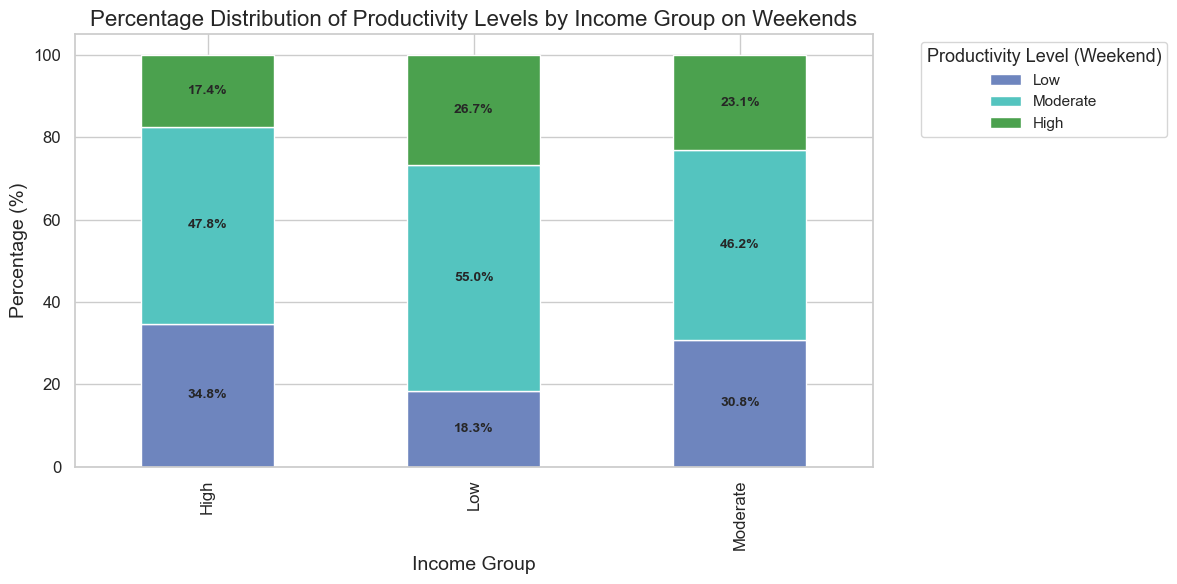

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



sns.set(style="whitegrid")

# Define the order for the productivity levels
level_order = ['Low', 'Moderate', 'High']


df['Activity_Level_weekend'] = pd.Categorical(df['Activity_Level_weekend'], categories=level_order, ordered=True)

# Calculate and print percentage distribution for weekends
weekday_counts = df.groupby(['IncomeGroup', 'Activity_Level_weekend']).size().reset_index(name='Count')
weekday_totals = weekday_counts.groupby('IncomeGroup')['Count'].transform('sum')
weekday_counts['Percentage'] = (weekday_counts['Count'] / weekday_totals) * 100
print("Percentage distribution of productivity levels by income group on weekends:")
print(weekday_counts)

# Pivot the data to create a format suitable for a stacked bar plot
weekday_pivot = weekday_counts.pivot_table(index='IncomeGroup', 
                                           columns='Activity_Level_weekend', 
                                           values='Percentage', 
                                           aggfunc='sum').fillna(0)

# Reorder the columns in the pivot table to match the level order
weekday_pivot = weekday_pivot[level_order]

# Create a lighter version of the 'viridis' palette
viridis_palette = sns.color_palette("viridis", len(weekday_pivot.columns))

# Adjust the palette by lightening all but the top layer
lighter_palette = [(r + 0.2, g + 0.2, b + 0.2) if i != len(viridis_palette) - 1 else (r * 0.8, g * 0.8, b * 0.8) for i, (r, g, b) in enumerate(viridis_palette)]

# Ensure no values exceed 1.0 after adjustment
lighter_palette = [(min(r, 1), min(g, 1), min(b, 1)) for r, g, b in lighter_palette]

# Create a stacked bar plot for weekends
ax = weekday_pivot.plot(kind='bar', stacked=True, color=lighter_palette, figsize=(12, 6))
plt.title('Percentage Distribution of Productivity Levels by Income Group on Weekends', fontsize=16)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Productivity Level (Weekend)', title_fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate percentages in the middle of the stacked bars in bold
for i, patch in enumerate(ax.patches):
    # Get the height of the current segment
    height = patch.get_height()
    
    if height > 0:  
        # Calculate the position of the text (middle of the bar segment)
        y_position = patch.get_y() + height / 2
        # Get the x position (middle of the bar group)
        x_position = patch.get_x() + patch.get_width() / 2
        
        ax.text(x_position, y_position, f'{height:.1f}%', ha='center', va='center', fontsize=10, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8096\3792736510.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_counts = df.groupby(['IncomeGroup', 'Activity_Level_weekday']).size().reset_index(name='Count')


Percentage distribution of productivity levels by income group on weekdays:
  IncomeGroup Activity_Level_weekday  Count  Percentage
0        High                    Low     16   34.782609
1        High               Moderate     19   41.304348
2        High                   High     11   23.913043
3         Low                    Low     10   16.666667
4         Low               Moderate     31   51.666667
5         Low                   High     19   31.666667
6    Moderate                    Low     37   31.623932
7    Moderate               Moderate     57   48.717949
8    Moderate                   High     23   19.658120


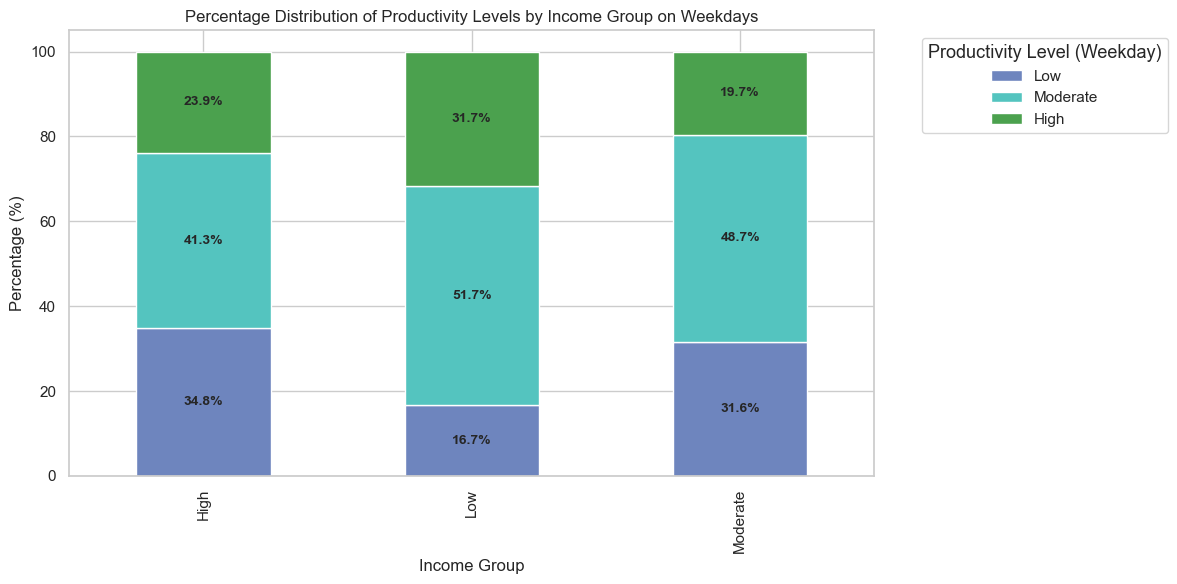

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# Define the order for the productivity levels
level_order = ['Low', 'Moderate', 'High']

# Ensure 'Activity_Level_weekday' is an ordered categorical variable
df['Activity_Level_weekday'] = pd.Categorical(df['Activity_Level_weekday'], categories=level_order, ordered=True)

# Calculate and print percentage distribution for weekdays
weekday_counts = df.groupby(['IncomeGroup', 'Activity_Level_weekday']).size().reset_index(name='Count')
weekday_totals = weekday_counts.groupby('IncomeGroup')['Count'].transform('sum')
weekday_counts['Percentage'] = (weekday_counts['Count'] / weekday_totals) * 100
print("Percentage distribution of productivity levels by income group on weekdays:")
print(weekday_counts)

# Pivot the data to create a format suitable for a stacked bar plot
weekday_pivot = weekday_counts.pivot_table(index='IncomeGroup', 
                                           columns='Activity_Level_weekday', 
                                           values='Percentage', 
                                           aggfunc='sum').fillna(0)

# Reorder the columns in the pivot table to match the level order
weekday_pivot = weekday_pivot[level_order]

# Create a color palette with a lighter version of 'viridis'
viridis_palette = sns.color_palette("viridis", len(weekday_pivot.columns))


lighter_palette = [(r + 0.2, g + 0.2, b + 0.2) if i != len(viridis_palette) - 1 else (r * 0.8, g * 0.8, b * 0.8) 
                   for i, (r, g, b) in enumerate(viridis_palette)]

# Ensure no values exceed 1.0 after adjustment
lighter_palette = [(min(r, 1), min(g, 1), min(b, 1)) for r, g, b in lighter_palette]

# Create a stacked bar plot for weekdays with the adjusted colors
ax = weekday_pivot.plot(kind='bar', stacked=True, color=lighter_palette, figsize=(12, 6))
plt.title('Percentage Distribution of Productivity Levels by Income Group on Weekdays')
plt.xlabel('Income Group')
plt.ylabel('Percentage (%)')
plt.legend(title='Productivity Level (Weekday)', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate percentages in the middle of the stacked bars in bold
for i, patch in enumerate(ax.patches):
    # Get the height of the current segment
    height = patch.get_height()
    
    if height > 0: 
        # Calculate the position of the text (middle of the bar segment)
        y_position = patch.get_y() + height / 2
        # Get the x position (middle of the bar group)
        x_position = patch.get_x() + patch.get_width() / 2
        
        ax.text(x_position, y_position, f'{height:.1f}%', ha='center', va='center', fontsize=10, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()
